# ===============================
# Introduction
# ===============================

This project focuses on the pressing issue of student mental health, specifically addressing anxiety, stress, and depression in the context of academic pressure. Utilizing a dataset of 1977 student responses, this study employs three distinct machine learning models: Logistic Regression, Naive Bayes, and a Neural Network (MLP Classifier) to predict the presence and severity of these mental health challenges. The primary objective is to develop a predictive model that can accurately identify students at risk, enabling timely intervention and support.

# ===============================
# SETUP & LIBRARIES
# ===============================

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# ===============================
# LOAD DATASET
# ===============================

In [ ]:
dataset = pd.read_csv("/content/13.csv")

#dataset = pd.read_csv("/content/drive/MyDrive/CSE422/Project/13.csv")
print(f"Dataset Shape: {dataset.shape}")
print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}\n")

Dataset Shape: (1977, 37)
Rows: 1977, Columns: 37



# Feature Names and its Datatypes

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 37 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1971 non-null   object
 2   5. Academic Year                                                                                            

# ===============================
# COLUMN RENAME FOR READABILITY
# ===============================

In [ ]:
dataset_cols = {i: col for i, col in enumerate(dataset.columns)}
summarized_data_col = {
    0: 'age', 1: 'gender', 2: 'academic_year', 3: 'cgpa',
    4: 'scholarship_status', 5: 'academic_nervousness', 6: 'academic_worry',
    7: 'trouble_relaxing', 8: 'academic_irritation', 9: 'excessive_worry',
    10: 'academic_restlessness', 11: 'fear_of_failure', 12: 'anxiety_value',
    13: 'anxiety_label', 14: 'academic_upset', 15: 'loss_of_control',
    16: 'academic_stress', 17: 'coping_difficulty', 18: 'academic_confidence',
    19: 'academic_success', 20: 'irritation_control', 21: 'top_performance',
    22: 'anger_low_grades', 23: 'overwhelming_difficulties', 24: 'stress_value',
    25: 'stress_label', 26: 'low_interest', 27: 'depressed_feelings',
    28: 'sleep_issues', 29: 'fatigue', 30: 'appetite_changes',
    31: 'self_failure_feelings', 32: 'concentration_issues',
    33: 'movement_changes', 34: 'self_harm_thoughts', 35: 'depression_value',
    36: 'depression_label'
}
dataset.rename(columns={v: summarized_data_col[k] for k, v in dataset_cols.items()}, inplace=True)


# Data Statistics

In [ ]:
dataset.nunique()

,0
age,5
gender,3
academic_year,5
cgpa,6
scholarship_status,2
academic_nervousness,4
academic_worry,4
trouble_relaxing,4
academic_irritation,4
excessive_worry,4


In [ ]:
dataset.isna().sum()

,0
age,0
gender,6
academic_year,0
cgpa,0
scholarship_status,0
academic_nervousness,0
academic_worry,0
trouble_relaxing,0
academic_irritation,0
excessive_worry,0


In [ ]:
#Selecting numerical features
numerical_data = dataset.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 29 numerical features: 

['academic_nervousness', 'academic_worry', 'trouble_relaxing', 'academic_irritation', 'excessive_worry', 'academic_restlessness', 'fear_of_failure', 'anxiety_value', 'academic_upset', 'loss_of_control', 'academic_stress', 'coping_difficulty', 'academic_confidence', 'academic_success', 'irritation_control', 'top_performance', 'anger_low_grades', 'overwhelming_difficulties', 'stress_value', 'low_interest', 'depressed_feelings', 'sleep_issues', 'fatigue', 'appetite_changes', 'self_failure_feelings', 'concentration_issues', 'movement_changes', 'self_harm_thoughts', 'depression_value']


In [ ]:
#Selecting categoricalfeatures
categorical_data=dataset.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 8 categorical features: 

['age', 'gender', 'academic_year', 'cgpa', 'scholarship_status', 'anxiety_label', 'stress_label', 'depression_label']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
academic_nervousness,1977.0,1.770359,0.951704,0.0,1.0,2.0,3.0,3.0
academic_worry,1977.0,1.629236,1.028252,0.0,1.0,2.0,3.0,3.0
trouble_relaxing,1977.0,1.747092,0.996336,0.0,1.0,2.0,3.0,3.0
academic_irritation,1977.0,1.777441,0.966041,0.0,1.0,2.0,3.0,3.0
excessive_worry,1977.0,1.859383,0.982362,0.0,1.0,2.0,3.0,3.0
academic_restlessness,1977.0,1.787557,0.993087,0.0,1.0,2.0,3.0,3.0
fear_of_failure,1977.0,1.719777,1.057735,0.0,1.0,2.0,3.0,3.0
anxiety_value,1977.0,12.290845,5.496399,0.0,8.0,13.0,17.0,21.0
academic_upset,1977.0,2.341932,1.178599,0.0,2.0,2.0,3.0,4.0
loss_of_control,1977.0,2.319676,1.154547,0.0,2.0,2.0,3.0,4.0


In [ ]:
categorical_data.describe().T

,count,unique,top,freq
age,1977,5,18-22,1273
gender,1971,3,Male,1369
academic_year,1977,5,First Year or Equivalent,592
cgpa,1977,6,3.00 - 3.39,572
scholarship_status,1977,2,No,1571
anxiety_label,1977,4,Severe Anxiety,714
stress_label,1977,3,Moderate Stress,1316
depression_label,1977,6,Moderately Severe Depression,495


In [ ]:
# Skewness measures the asymmetry of the distribution of a dataset.
# Skewness = 0 → Perfectly symmetrical (e.g., normal distribution)
# Skewness < 0 → Left-skewed (long tail on the left)
# Skewness > 0 → Right-skewed (long tail on the right)
# It helps you understand how balanced your data is and whether transformations are needed.
# 📊 Interpretation of Skewness Values:
# Skewness Value Interpretation
# ~ 0 Symmetrical (normal-ish)
# 0 to ±0.5 Fairly symmetrical
# ±0.5 to ±1 Moderately skewed
# greater than ±1 Highly skewed
numerical_data.skew()

,0
academic_nervousness,-0.212193
academic_worry,-0.039330
trouble_relaxing,-0.159674
academic_irritation,-0.163491
excessive_worry,-0.299283
academic_restlessness,-0.213637
fear_of_failure,-0.154958
anxiety_value,-0.205279
academic_upset,-0.239091
loss_of_control,-0.172693


In [ ]:
dataset

,age,gender,academic_year,cgpa,scholarship_status,academic_nervousness,academic_worry,trouble_relaxing,academic_irritation,excessive_worry,...,depressed_feelings,sleep_issues,fatigue,appetite_changes,self_failure_feelings,concentration_issues,movement_changes,self_harm_thoughts,depression_value,depression_label
0,18-22,Female,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,2,2,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,First Year or Equivalent,3.80 - 4.00,No,2,2,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,First Year or Equivalent,3.00 - 3.39,No,2,1,1,0,2,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,2,1,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,1,1,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,1,1,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Other,3.80 - 4.00,No,1,0,1,1,3,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,2,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


# ===============================
# Plots
# ===============================

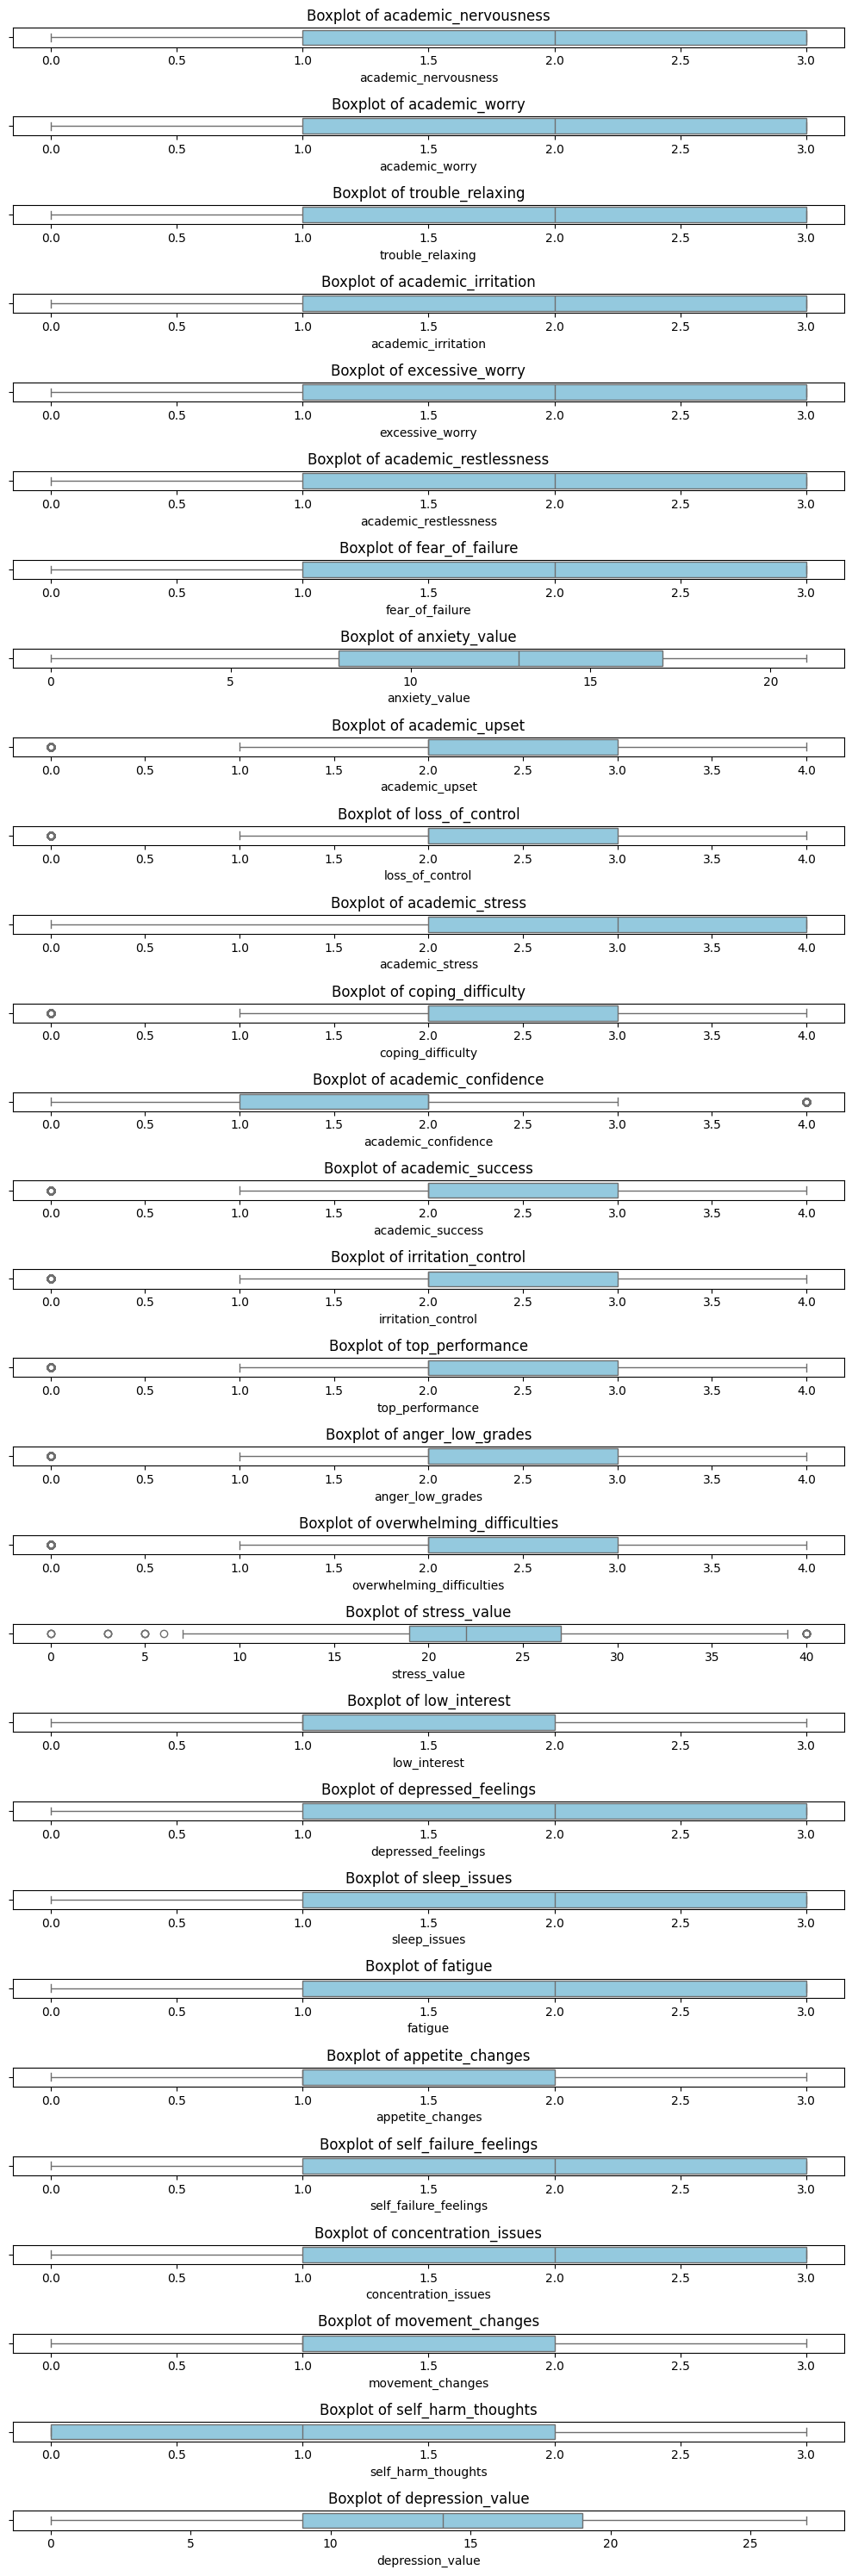

In [ ]:
# Select only numerical columns for boxplot analysis
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
plt.figure(figsize=(10, 30))

# Plot boxplots for each numerical feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dataset[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

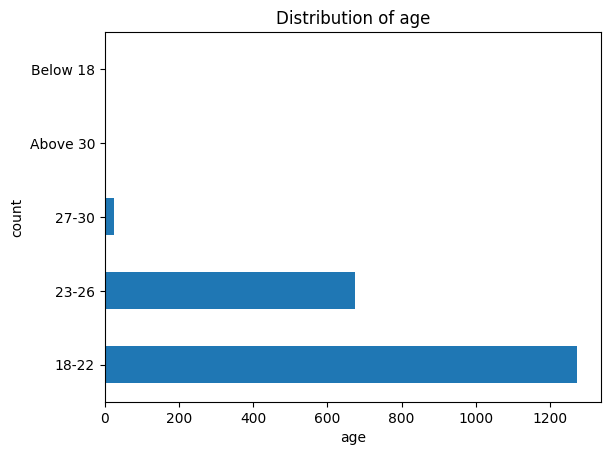

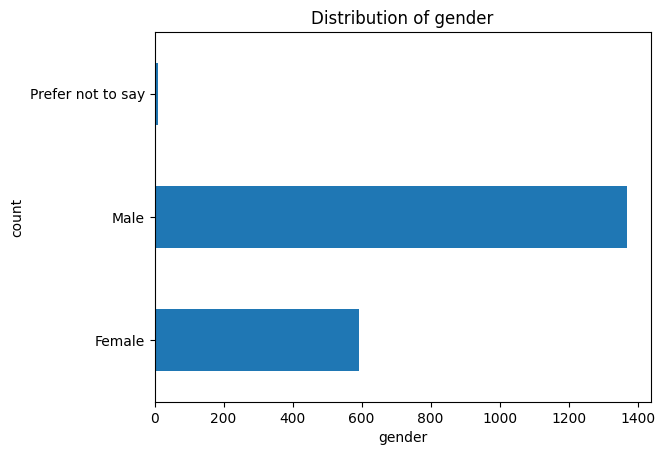

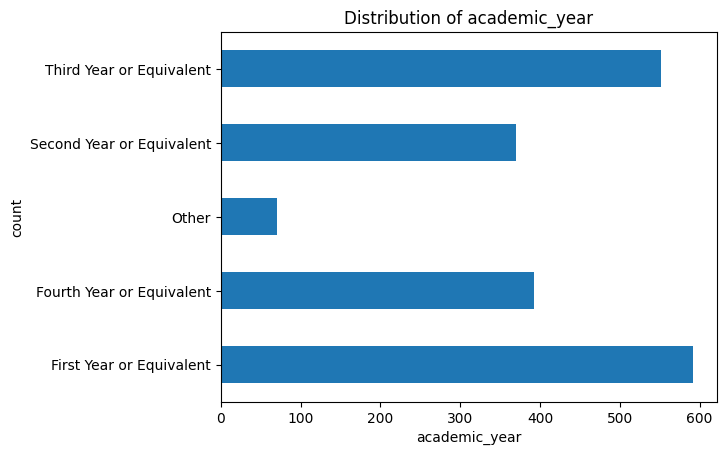

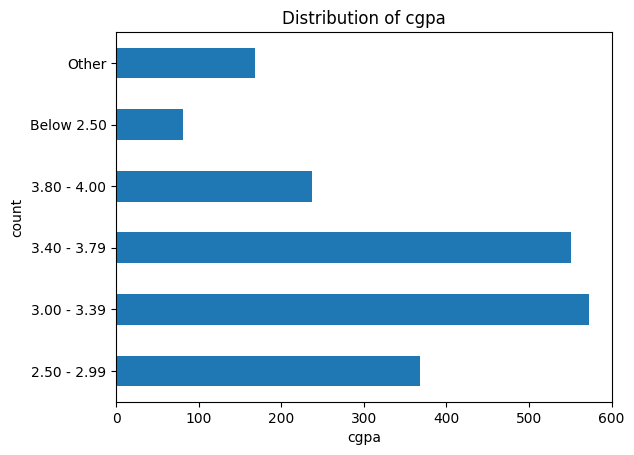

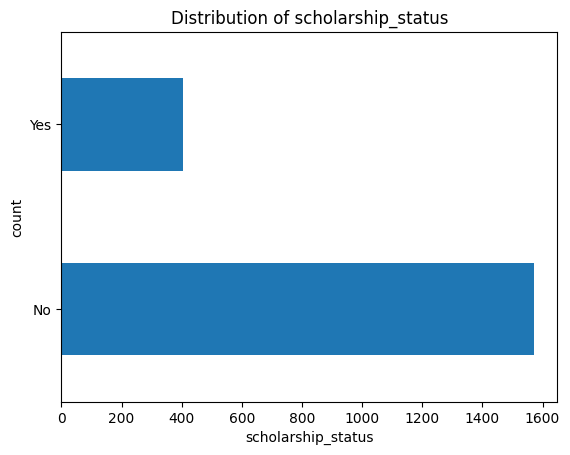

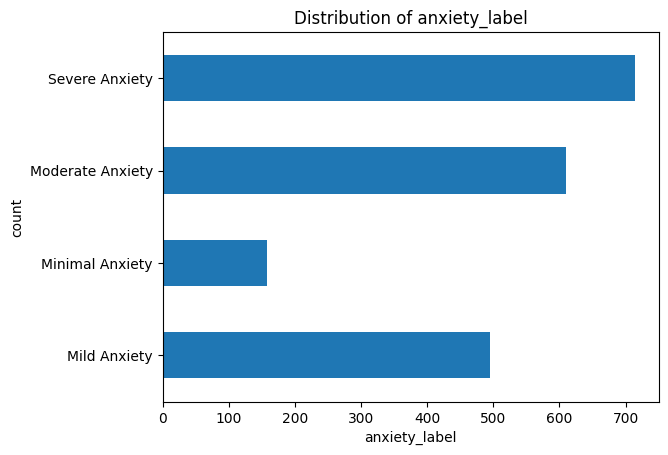

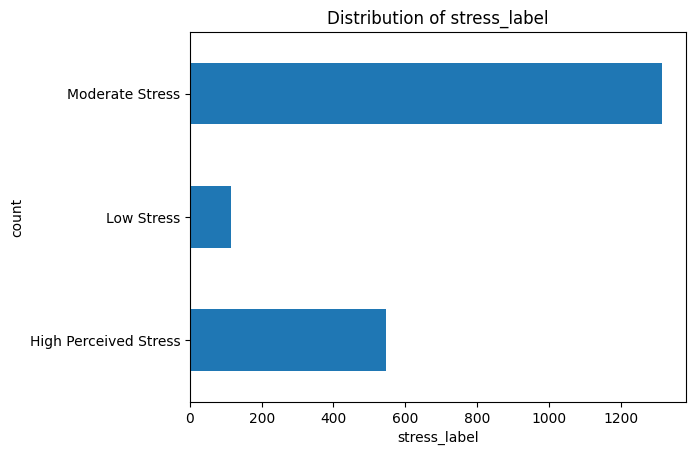

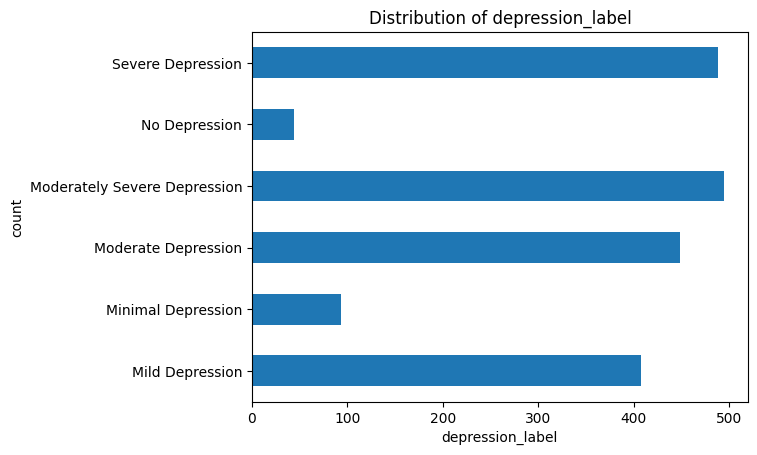

In [ ]:
for col in categorical_features:
    plt.title(f'Distribution of {col}')
    categorical_data[col].value_counts().sort_index().plot(kind='barh', rot=0, xlabel=col,ylabel='count')
    plt.show()

# ===============================
# Correlation matrix
# ===============================

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,academic_nervousness,academic_worry,trouble_relaxing,academic_irritation,excessive_worry,academic_restlessness,fear_of_failure,anxiety_value,academic_upset,loss_of_control,...,low_interest,depressed_feelings,sleep_issues,fatigue,appetite_changes,self_failure_feelings,concentration_issues,movement_changes,self_harm_thoughts,depression_value
academic_nervousness,1.000000,0.495772,0.511390,0.635193,0.643153,0.580194,0.598137,0.805124,0.491888,0.511299,...,0.178723,0.592705,0.440335,0.500472,0.415241,0.555560,0.483629,0.428253,0.416095,0.627624
academic_worry,0.495772,1.000000,0.473536,0.481888,0.498965,0.441217,0.447900,0.698547,0.342687,0.356513,...,0.187395,0.426127,0.363543,0.393809,0.361505,0.417127,0.388554,0.324906,0.289480,0.492171
trouble_relaxing,0.511390,0.473536,1.000000,0.564550,0.517929,0.519029,0.499364,0.740075,0.377510,0.400276,...,0.205356,0.494548,0.438430,0.474976,0.372413,0.444108,0.436933,0.371762,0.318506,0.554905
academic_irritation,0.635193,0.481888,0.564550,1.000000,0.695984,0.583702,0.605070,0.824525,0.459347,0.492151,...,0.204851,0.588961,0.443092,0.508928,0.423595,0.563925,0.503970,0.447433,0.422247,0.642284
excessive_worry,0.643153,0.498965,0.517929,0.695984,1.000000,0.660851,0.662909,0.846620,0.435808,0.459529,...,0.190281,0.616251,0.452073,0.515111,0.425131,0.576295,0.513104,0.434942,0.389694,0.642935
academic_restlessness,0.580194,0.441217,0.519029,0.583702,0.660851,1.000000,0.620680,0.797915,0.396751,0.422960,...,0.189561,0.559738,0.442977,0.533634,0.412510,0.500339,0.451295,0.438958,0.387305,0.611745
fear_of_failure,0.598137,0.447900,0.499364,0.605070,0.662909,0.620680,1.000000,0.807292,0.452806,0.459616,...,0.209400,0.625255,0.482671,0.509573,0.431500,0.583713,0.493026,0.476058,0.446520,0.666259
anxiety_value,0.805124,0.698547,0.740075,0.824525,0.846620,0.797915,0.807292,1.000000,0.535160,0.561286,...,0.247788,0.707107,0.555328,0.622422,0.515040,0.659581,0.592335,0.529625,0.483708,0.767879
academic_upset,0.491888,0.342687,0.377510,0.459347,0.435808,0.396751,0.452806,0.535160,1.000000,0.672744,...,0.131622,0.461601,0.364514,0.397025,0.323675,0.451946,0.376988,0.338766,0.327872,0.496871
loss_of_control,0.511299,0.356513,0.400276,0.492151,0.459529,0.422960,0.459616,0.561286,0.672744,1.000000,...,0.128084,0.471070,0.386529,0.414361,0.322515,0.470099,0.403984,0.341878,0.320479,0.510018


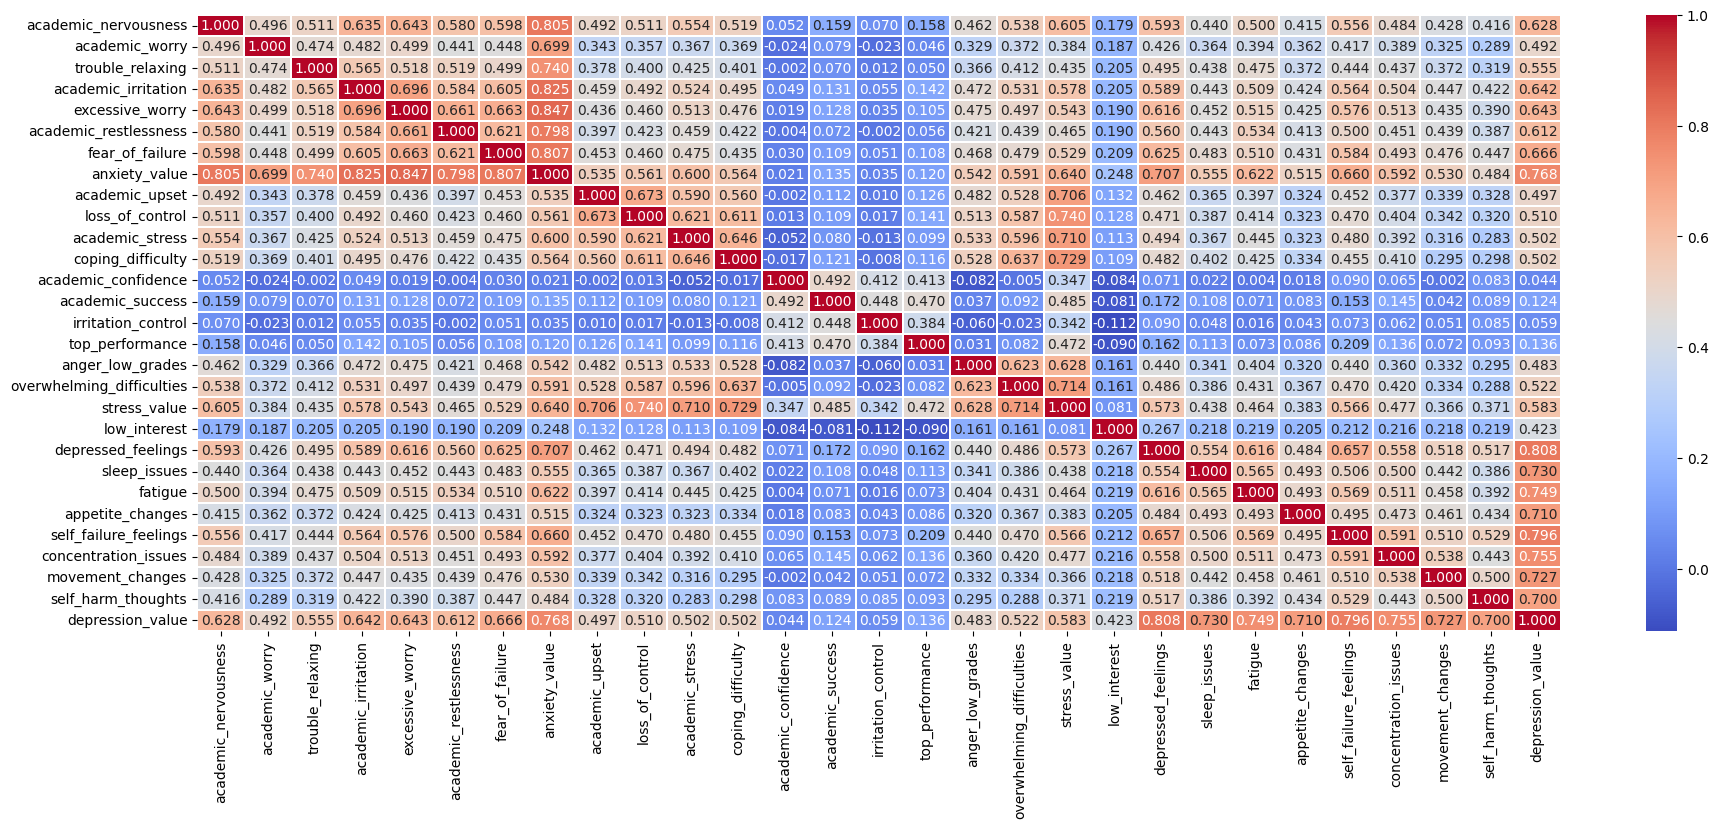

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

# ===============================
# DATA PREPROCESSING
# ===============================

In [ ]:
print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# Handle missing values
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        if dataset[col].dtype == 'object':
            mode_val = dataset[col].mode()[0]
            dataset[col].fillna(mode_val, inplace=True)
            print(f"Filled missing {col} with mode: {mode_val}")
        else:
            median_val = dataset[col].median()
            dataset[col].fillna(median_val, inplace=True)
            print(f"Filled missing {col} with median: {median_val}")

# Remove duplicates
initial_size = len(dataset)
dataset.drop_duplicates(inplace=True)
print(f"Removed {initial_size - len(dataset)} duplicate rows")

# Encode categorical variables
target_col = dataset.columns[-1]
print(f"\nTarget column: {target_col}")

categorical_cols = dataset.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(target_col) if target_col in categorical_cols else categorical_cols

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()           # As there is an inherent order or hierarchy among the categories
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"\nEncoding for {col}: {mapping}")

# Encode target variable if categorical
target_encoder = None
if dataset[target_col].dtype == 'object':
    target_encoder = LabelEncoder()
    dataset[target_col] = target_encoder.fit_transform(dataset[target_col])
    mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))
    print(f"\nEncoding for target {target_col}: {mapping}")

# Drop derived/duplicate columns
columns_to_drop = ['depression_value', 'anxiety_value', 'anxiety_label', 'stress_value', 'stress_label']
columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]
dataset.drop(columns=columns_to_drop, inplace=True)
print(f"\nDropped columns: {columns_to_drop}")


# Dropping column based on correlation
# No noticeable columns where the correlation value is greater than 0.75 at least twice
# However, two pairs columns found where correlation value is the same compared to all features:
# academic_success and top_performance ; academic_confidence and irritation_control
# Dropping academic_success achieves better f1 overall.
# Dropping irritation_control achieves better f1 overall.

dataset.drop(columns=['academic_success'], inplace=True)
print(f"\nDropped columns: academic_success")

dataset.drop(columns=['irritation_control'], inplace=True)
print(f"\nDropped columns: irritation_control")

print(f"\nFinal dataset shape: {dataset.shape}")

DATA PREPROCESSING
Filled missing gender with mode: Male
Removed 5 duplicate rows

Target column: depression_label

Encoding for age: {'18-22': np.int64(0), '23-26': np.int64(1), '27-30': np.int64(2), 'Above 30': np.int64(3), 'Below 18': np.int64(4)}

Encoding for gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Prefer not to say': np.int64(2)}

Encoding for academic_year: {'First Year or Equivalent': np.int64(0), 'Fourth Year or Equivalent': np.int64(1), 'Other': np.int64(2), 'Second Year or Equivalent': np.int64(3), 'Third Year or Equivalent': np.int64(4)}

Encoding for cgpa: {'2.50 - 2.99': np.int64(0), '3.00 - 3.39': np.int64(1), '3.40 - 3.79': np.int64(2), '3.80 - 4.00': np.int64(3), 'Below 2.50': np.int64(4), 'Other': np.int64(5)}

Encoding for scholarship_status: {'No': np.int64(0), 'Yes': np.int64(1)}

Encoding for anxiety_label: {'Mild Anxiety': np.int64(0), 'Minimal Anxiety': np.int64(1), 'Moderate Anxiety': np.int64(2), 'Severe Anxiety': np.int64(3)}

Encoding for stres

# ===============================
# TRAIN-TEST SPLIT & SCALING
# ===============================

In [ ]:
X = dataset.drop(target_col, axis=1)
y = dataset[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()        # Preventing Feature Dominance
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1577, 29), Test set size: (395, 29)


# ===============================
# MODEL TRAINING
# ===============================

In [ ]:
print("MODEL TRAINING...")

models = {}

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=5000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
print(f"\nLogistic Regression completed")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
models['Naive Bayes'] = nb_model
print(f"\nNaive Bayes completed")

# Neural Network                            optimal
nn_model = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
models['Neural Network'] = nn_model
print(f"\nNeural Network completed")

# K-Means (unsupervised)
n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)
print(f"\nK-Means completed with {n_clusters} clusters")

MODEL TRAINING...

Logistic Regression completed

Naive Bayes completed

Neural Network completed

K-Means completed with 6 clusters


# ===============================
# MODEL EVALUATION
# ===============================

In [ ]:
print("="*50)
print("MODEL EVALUATION")
print("="*50)

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

MODEL EVALUATION

Logistic Regression Results:
Accuracy: 0.9696, F1 Score: 0.9688

Naive Bayes Results:
Accuracy: 0.7392, F1 Score: 0.7381

Neural Network Results:
Accuracy: 0.9595, F1 Score: 0.9593


In [ ]:
# NN Performance when (128,64) used
# Neural Network Results:
# Accuracy: 0.9494, F1 Score: 0.9491

In [ ]:
# NN Performance when (256,128) used
# Neural Network Results:
# Accuracy: 0.9215, F1 Score: 0.9213

In [ ]:
# NN Performance when (32,16) used
# Neural Network Results:
# Accuracy: 0.9418, F1 Score: 0.9419

In [ ]:
# Performance when academic_confidence dropped

# Logistic Regression Results:
# Accuracy: 0.9696, F1 Score: 0.9690

# Naive Bayes Results:
# Accuracy: 0.7367, F1 Score: 0.7347

# Neural Network Results:
# Accuracy: 0.9519, F1 Score: 0.9515

In [ ]:
# # Performance when academic_success dropped

# Logistic Regression Results:
# Accuracy: 0.9646, F1 Score: 0.9637

# Naive Bayes Results:
# Accuracy: 0.7316, F1 Score: 0.7304

# Neural Network Results:
# Accuracy: 0.9215, F1 Score: 0.9219

In [ ]:
# Performance when top_performance dropped

# Logistic Regression Results:
# Accuracy: 0.9595, F1 Score: 0.9582

# Naive Bayes Results:
# Accuracy: 0.7266, F1 Score: 0.7255

# Neural Network Results:
# Accuracy: 0.9190, F1 Score: 0.9190

In [ ]:
# Performance when the correlated columns were not dropped
# ==================================================
# MODEL EVALUATION
# ==================================================

# Logistic Regression Results:
# Accuracy: 0.9595, F1 Score: 0.9586

# Naive Bayes Results:
# Accuracy: 0.7316, F1 Score: 0.7310

# Neural Network Results:
# Accuracy: 0.9165, F1 Score: 0.9162

# ===============================
# VISUALIZATION
# ===============================

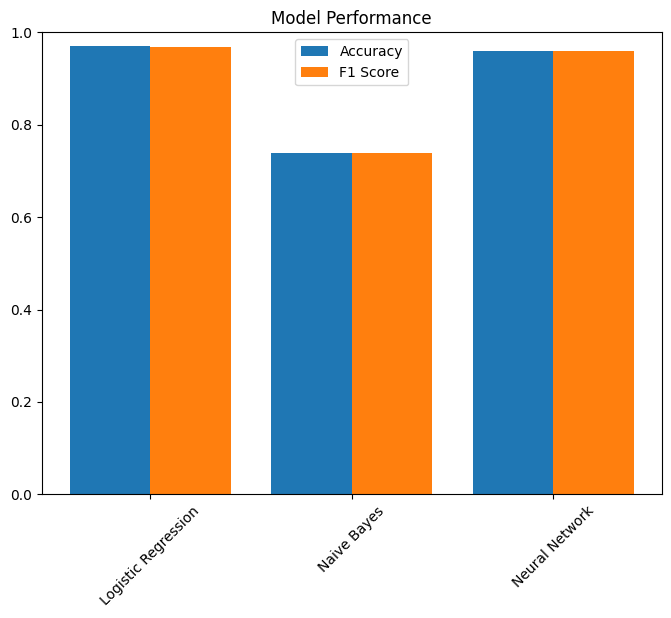

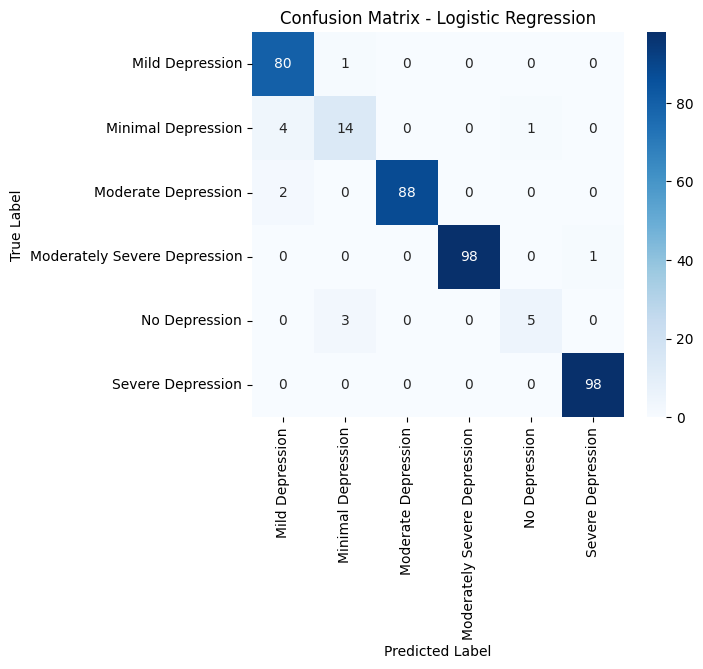

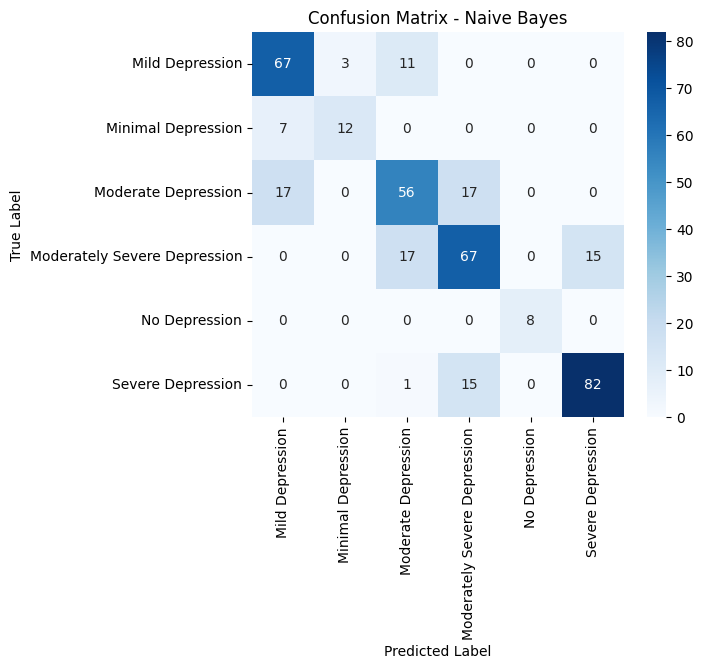

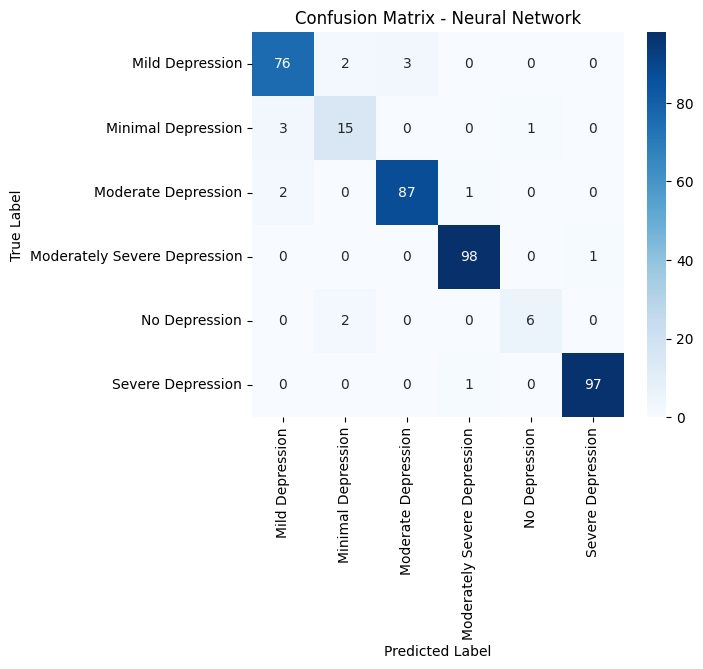

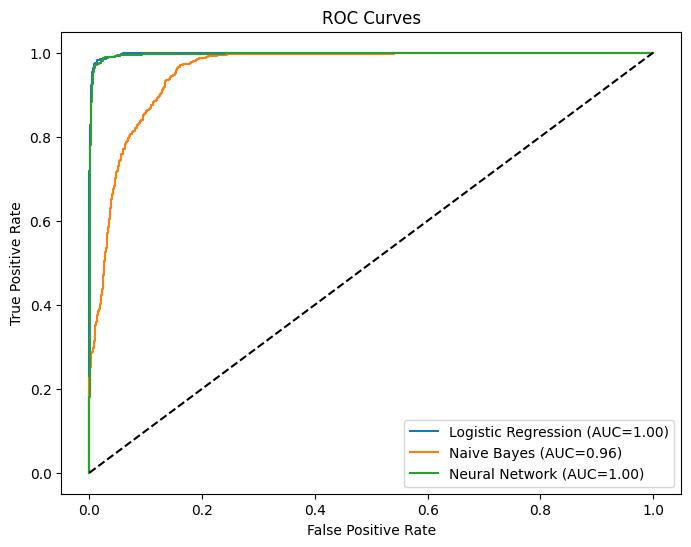

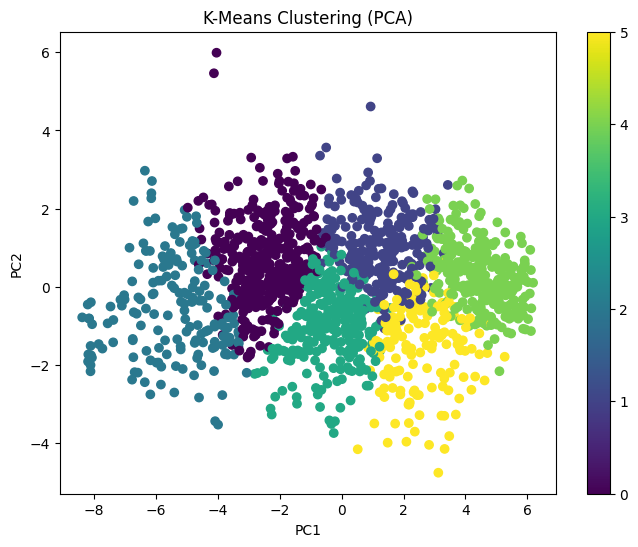

In [ ]:
# 1. Bar chart for performance
plt.figure(figsize=(8, 6))
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
f1_scores = [results[m]['f1_score'] for m in model_names]

x = np.arange(len(model_names))
plt.bar(x - 0.2, accuracies, 0.4, label='Accuracy')
plt.bar(x + 0.2, f1_scores, 0.4, label='F1 Score')
plt.xticks(x, model_names, rotation=45)
plt.ylim(0, 1)
plt.title("Model Performance")
plt.legend()
plt.show()

# 2. Confusion matrices (one per model)
for name, res in results.items():
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, res['predictions'])
    labels = target_encoder.classes_ if target_encoder else np.unique(y)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# 3. ROC curves
plt.figure(figsize=(8, 6))
n_classes = len(np.unique(y))
if n_classes == 2:
    for name in model_names:
        if results[name]['probabilities'] is not None:
            fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'][:, 1])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
else:
    for name in model_names:
        if results[name]['probabilities'] is not None:
            y_bin = label_binarize(y_test, classes=np.unique(y))
            fpr, tpr, _ = roc_curve(y_bin.ravel(), results[name]['probabilities'].ravel())
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 4. K-Means cluster visualization
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title("K-Means Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ===============================
# PERFORMANCE SUMMARY
# ===============================

In [ ]:
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [results[m]['accuracy'] for m in model_names],
    'F1 Score': [results[m]['f1_score'] for m in model_names]
})

print("Performance Summary:")
print(performance_df.to_string(index=False))

best_model = performance_df.loc[performance_df['F1 Score'].idxmax()]['Model']
print(f"\nBest Model: {best_model}")

Performance Summary:
              Model  Accuracy  F1 Score
Logistic Regression  0.969620  0.968826
        Naive Bayes  0.739241  0.738068
     Neural Network  0.959494  0.959260

Best Model: Logistic Regression


In [ ]:
'''
Logistic Regression
The high accuracy and F1 score of Logistic Regression indicate that the relationship
between the features and the target variable is likely linearly separable.
As a linear model, it learns a linear decision boundary. The success of this model
suggests that a simple, straight-line boundary is sufficient to effectively classify the data.

Naive Bayes
The lower performance of Naive Bayes is likely due to the violation of its core
assumption: conditional independence of features. Naive Bayes assumes that each feature
is independent of the others given the class label. If the features in the dataset are correlated,
this assumption is incorrect, leading to a less accurate model and the observed drop in scores.

Neural Network
The strong performance of the Neural Network, while slightly lower than Logistic Regression
in this instance, suggests its ability to learn complex, non-linear patterns. However, its
performance not surpassing the simpler Logistic Regression model could be due to several factors:

Data Linearity: The data may be so close to linearly separable that the non-linear
complexity of the neural network provides no significant advantage.
Overfitting: A neural network can easily overfit the training data, capturing noise
instead of the true underlying patterns, which can reduce its performance on unseen test data.
Hyperparameters: Suboptimal choices for network architecture (number of layers, neurons)
or training parameters (learning rate, epochs) can limit the model's ability to achieve its full potential.
'''

"\nLogistic Regression\nThe high accuracy and F1 score of Logistic Regression indicate that the relationship\nbetween the features and the target variable is likely linearly separable.\nAs a linear model, it learns a linear decision boundary. The success of this model\nsuggests that a simple, straight-line boundary is sufficient to effectively classify the data.\n\nNaive Bayes\nThe lower performance of Naive Bayes is likely due to the violation of its core\nassumption: conditional independence of features. Naive Bayes assumes that each feature\nis independent of the others given the class label. If the features in the dataset are correlated,\nthis assumption is incorrect, leading to a less accurate model and the observed drop in scores.\n\nNeural Network\nThe strong performance of the Neural Network, while slightly lower than Logistic Regression\nin this instance, suggests its ability to learn complex, non-linear patterns. However, its\nperformance not surpassing the simpler Logistic R